In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#importing csv file from file
loan = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#inspect the dataframe
print(loan.columns)

print(loan.shape)

loan.info()


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)
(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#  code for column-wise null percentages
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [6]:
# checking duplicated value
sum(loan.duplicated(subset = "id")) == 0

True

# Many columns have 100% missing values.therefore dropping the columns having 70% missing values.

In [7]:
#code for dropping the columns having more than 70% missing value
loan = loan.loc[:, (pd.notnull(loan).sum(axis=0)>len(loan)*.7)]


In [8]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [9]:
print(loan.shape)


(39717, 53)


The datatype of int_rate is object(ie character) and represented in the form like 10% for analysis purpose lets change the datatype
to float64 and split % sign from the numbers.

In [10]:
#converting the datatype of int_rate column to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

The emp_length coloumn is of object type and represented by values like 10+ years ,< 1 year etc so lets extract the numeric value
from the column and change the datatype og column to numeric type.


In [11]:
#removing signs from employee length

loan['emp_length'] = loan["emp_length"].str.replace('+', '')
loan['emp_length'] = loan["emp_length"].str.replace('<', '')
loan['emp_length'] = loan["emp_length"].str.replace('years', '')
loan['emp_length'] = loan["emp_length"].str.replace('year', '')
# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [12]:
loan.loc[:, ['int_rate', 'emp_length']].head()

,int_rate,emp_length
0,10.65,10.0
1,15.27,1.0
2,15.96,10.0
3,13.49,10.0
4,12.69,1.0


'issue_d' is The month which the loan was funded which is in character type so changing the datatype to datetime.
and extracting month and year seperately


In [13]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [14]:
#changing datatype of 'issue_d' column
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [15]:
#extracting month and year from 'issue_d' column in seprate columns
loan['issue_month'] = loan['issue_d'].apply(lambda x: x.month)
loan['issue_year'] = loan['issue_d'].apply(lambda x: x.year)
loan.loc[:, ['issue_month', 'issue_year']].head()

,issue_month,issue_year
0,12,2011
1,12,2011
2,12,2011
3,12,2011
4,12,2011


the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.
therefore identifying those veriables which are usefull for approving or rejecting the loan application.
customer behavioural veriables are not useful in analysis so removing that veriables from dataset.

In [16]:
#removing behavioural veriables
cust_behaviour_var = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
loan=loan.drop(cust_behaviour_var, axis=1)

Also veriable like url,zip_code,address are not usefull in prediction therefore removing from dataset

In [17]:
#droppig columns like address and zip code etc
loan= loan.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [18]:
loan_status = loan.groupby('loan_status')
loan_status['loan_status'].count()

loan_status
Charged Off     5627
Current         1140
Fully Paid     32950
Name: loan_status, dtype: int64

In [19]:
loan_term = loan.pivot_table(values = "loan_status",index = 'term',aggfunc = "count")
loan_term

,loan_status
term,
36 months,29096
60 months,10621


# Analysis


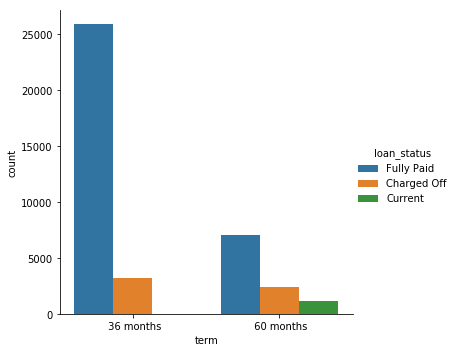

In [20]:
## plotting default rates across term of loan
sns.catplot(x = "term",hue = "loan_status", kind = "count",data = loan)

# we can see that 36 months default rate is more than 60 months. 

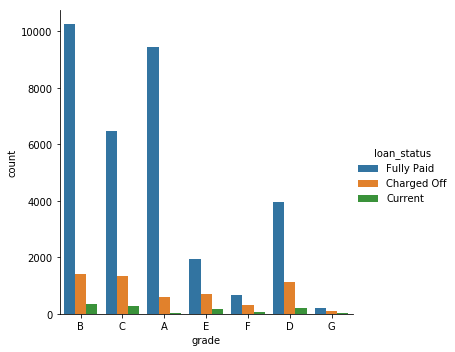

In [21]:
#plotting default rates across grade
sns.catplot(x = "grade",hue = "loan_status", kind = "count",data = loan)

# GRADE B GRADE C AND GRADE D HAS HIGHER DEFAULT RATE

<Figure size 4320x1440 with 0 Axes>

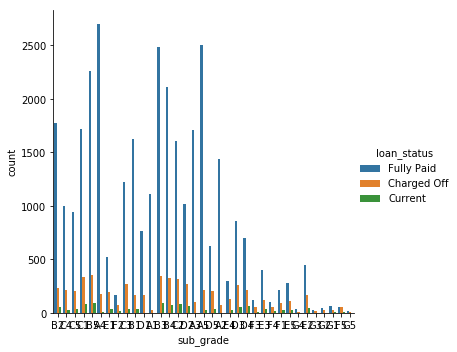

In [22]:
#plotting default rates across sub_grade 
plt.figure(figsize = (60,20))
sns.catplot(x = 'sub_grade',hue = "loan_status",kind = "count",data = loan)
plt.show()

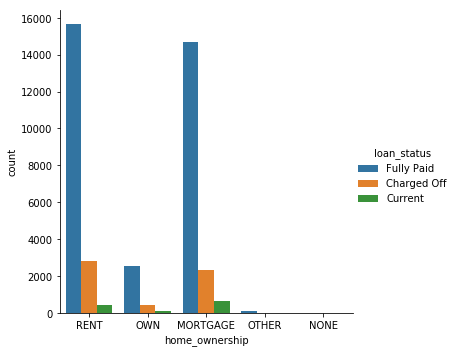

In [23]:
#plotting default rates across home_ownership
sns.catplot(x = "home_ownership",hue = "loan_status", kind = "count",data = loan)

# the people who are living in rent has more default rate and mortgage is also little less default rate than rent

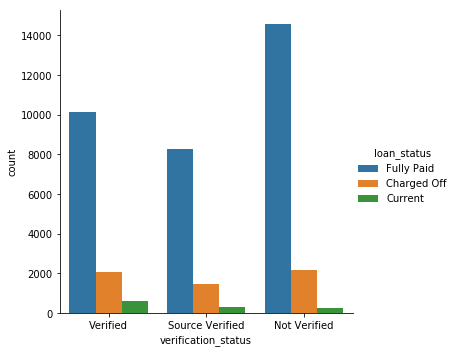

In [24]:
#plotting default rates across verification_status
sns.catplot(x = "verification_status",hue = "loan_status", kind = "count",data = loan)

# NOT VERIFIED LOANS ARE MORE DEFAULT AND ALSO VERIFIED LOAN DEFAULT RATE IS LITTLE LESS ONLY.

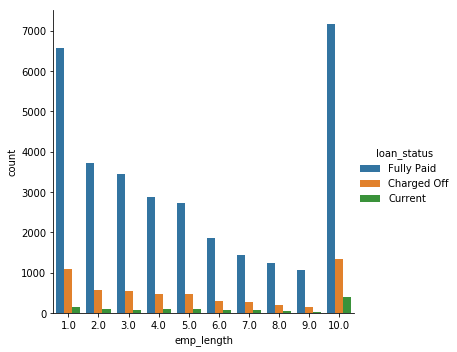

In [25]:
#plotting default rates across emp_length
sns.catplot(x = "emp_length",hue = "loan_status", kind = "count",data = loan)

# EMPLOYEE WHO HAS MORE EXPERIENCE THAN 10 YEARS ARE MORE DEFAULTER AND ALSO WHO ARE FRESHER LIKE LESS THAN 1 YEAR OF EXPERENCE ALSO MORE DEFAULTERS

In [26]:
loan_segment =loan.groupby(['purpose','loan_status'])


In [27]:
loan_p_s=pd.DataFrame(loan_segment['loan_status'].count())
loan_p_s

loan_status
purpose            loan_status             
car                Charged Off          160
                   Current               50
                   Fully Paid          1339
credit_card        Charged Off          542
                   Current              103
                   Fully Paid          4485
debt_consolidation Charged Off         2767
                   Current              586
                   Fully Paid         15288
educational        Charged Off           56
                   Fully Paid           269
home_improvement   Charged Off          347
                   Current              101
                   Fully Paid          2528
house              Charged Off           59
                   Current               14
                   Fully Paid           308
major_purchase     Charged Off          222
                   Current               37
                   Fully Paid          1928
medical            Charged Off          106
                   Current               12
                   Fully Paid           575
moving             Charged Off           92
                   Current                7
                   Fully Paid           484
other              Charged Off          633
                   Current              128
                   Fully Paid          3232
renewable_energy   Charged Off           19
                   Current                1
                   Fully Paid            83
small_business     Charged Off          475
                   Current               74
                   Fully Paid          1279
vacation           Charged Off           53
                   Current                6
                   Fully Paid           322
wedding            Charged Off           96
                   Current               21
                   Fully Paid           830

# DEBT CONSOLIDATION HAS MORE DEFAULT RATE, BUT PEOPLE IN RENEWABLE ENERGY PURPOSE HAS LESS DEFAULT RATE

<Figure size 14400x720 with 0 Axes>

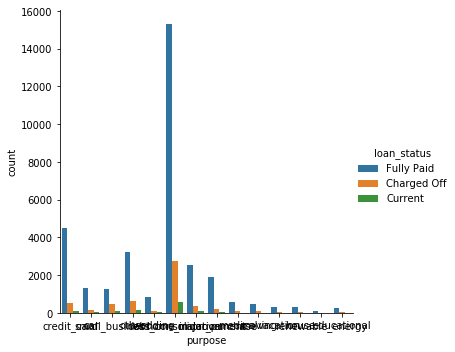

In [28]:
#plotting default rates across purpose
plt.figure(num = 2,figsize =(200,10))
sns.catplot(x = "purpose",hue = "loan_status", kind = "count",data = loan)

# loan Taken for small business deafault more

In [29]:
# the distribution of loans across years
loan.groupby('issue_year').issue_year.count()


issue_year
2007      251
2008     1562
2009     4716
2010    11532
2011    21656
Name: issue_year, dtype: int64

# we can see that number of loans issued over years incresed.

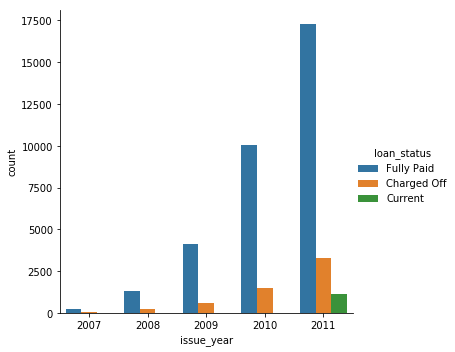

In [30]:
# lets compare the default rates across years
sns.catplot(x = "issue_year",hue = "loan_status", kind = "count",data = loan)

# WE CAN SEE THAT IN 2011 DEFAULT RATE IS HIGH AS WE INCREASE BY YEAR BY YEAR 

# Let's now analyse how the default rate varies across continuous variables.

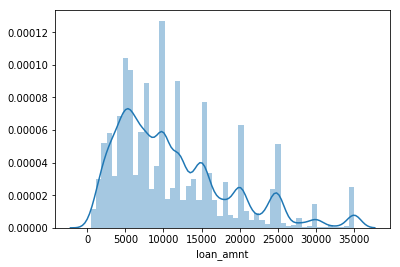

In [31]:
#plotting loan amount
sns.distplot(loan['loan_amnt'])
plt.show()



# the median of loan amount is around 10000.

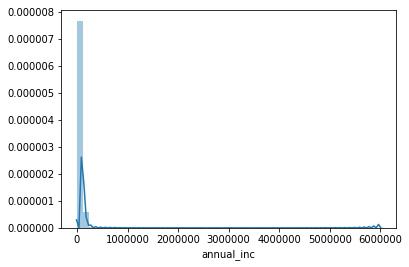

In [32]:
sns.distplot(loan['annual_inc'])
plt.show()

# THE MEDIAN OF ANNUAL INCOME IS AROUND 100000

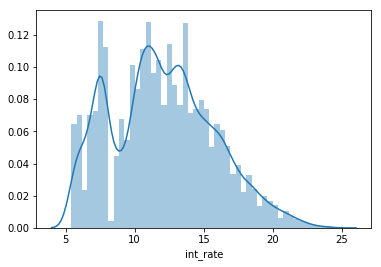

In [33]:
sns.distplot(loan["int_rate"])
plt.show()

# THE MEDIAN INTREST RATE IS AROUND 10 TO 15 PERCENT

In [34]:
#binning loan amounts to low,high,medium,very high categogy
loan['loan_amnt'] = pd.cut(loan['loan_amnt'], [0,5000,15000,25000,40000], labels=["low", "Medium","High","very_High"],right=False)
loan.loan_amnt.value_counts()

Medium       21102
High          8095
low           7517
very_High     3003
Name: loan_amnt, dtype: int64

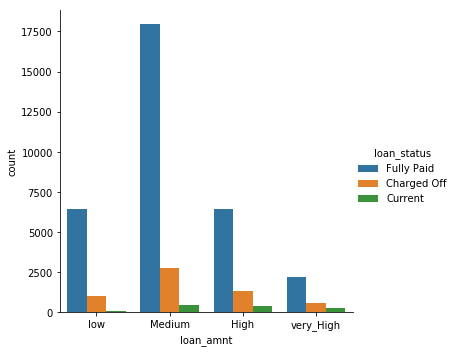

In [35]:
#compairing default rate across loan amount
sns.catplot(x = "loan_amnt",hue = "loan_status", kind = "count",data = loan)

# people taking medium loan amount are more defaulters

In [36]:
# binning loan amount to low ,high,medium,very high 
loan['int_rate'] = pd.cut(loan['int_rate'], [0,10,15,20,30], labels=["low", "Medium","High","very_High"],right=False)


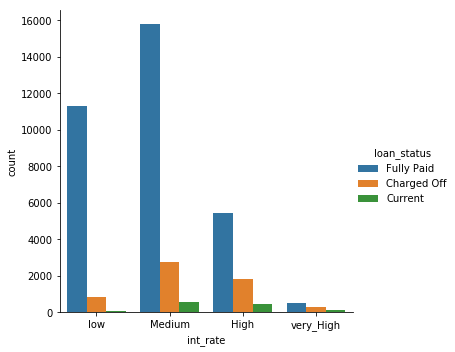

In [37]:
sns.catplot(x = "int_rate",hue = "loan_status", kind = "count",data = loan)

# more default rate are in medium intrest rate

In [38]:
# binning dti(debt to income ratio) to low ,high,medium
loan['dti'] = pd.cut(loan['dti'], [0,10,20,30], labels=["low", "Medium","High"],right=False)

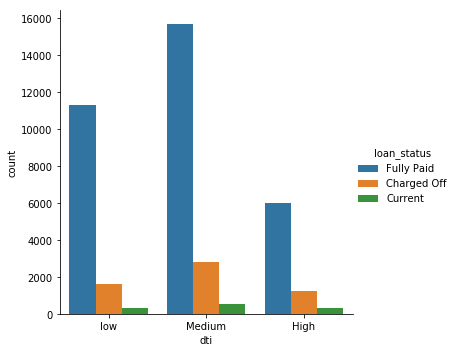

In [39]:
sns.catplot(x = "dti",hue = "loan_status", kind = "count",data = loan)

# medium dti ratio are more defaulters

In [40]:
# binning 'funded_amnt' to low ,high,medium
loan['funded_amnt'] = pd.cut(loan['funded_amnt'], [0,10000,20000,30000], labels=["low", "Medium","High"],right=False)

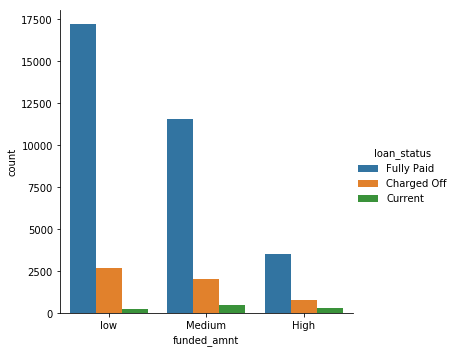

In [41]:
sns.catplot(x = "funded_amnt",hue = "loan_status", kind = "count",data = loan)

# lower funded amount has more defaulter

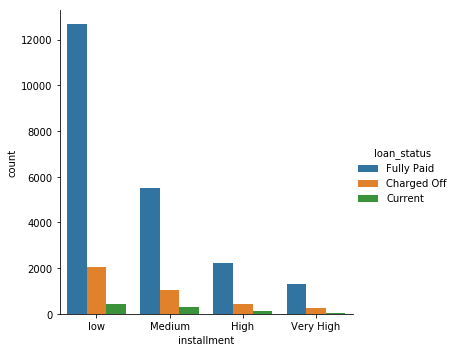

In [42]:
#binning 'installment' to low ,high,medium,very high and  comparing default rates across installment
loan['installment'] = pd.cut(loan['installment'], [200,400,600,800,1500], labels=["low", "Medium","High","Very High"],right=False)
sns.catplot(x = "installment",hue = "loan_status", kind = "count",data = loan)

# lower installment has high default rate

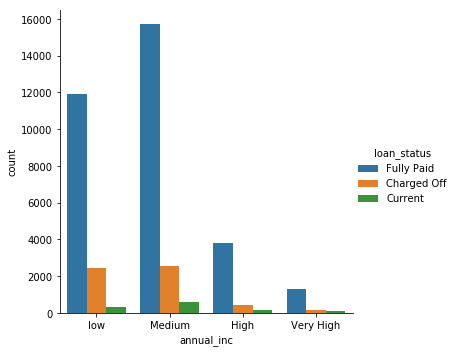

In [43]:
#binning 'annual_inc' to low ,high,medium,very high and  comparing default rates across annual_income
loan['annual_inc'] = pd.cut(loan['annual_inc'], [0,50000,100000,150000,300000], labels=["low", "Medium","High","Very High"],right=False)
sns.catplot(x = "annual_inc",hue = "loan_status", kind = "count",data = loan)

# medium annual income has higher default rate 

# Segmented Univariate Analysis


We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.
lets get some insights from purpose of loans.

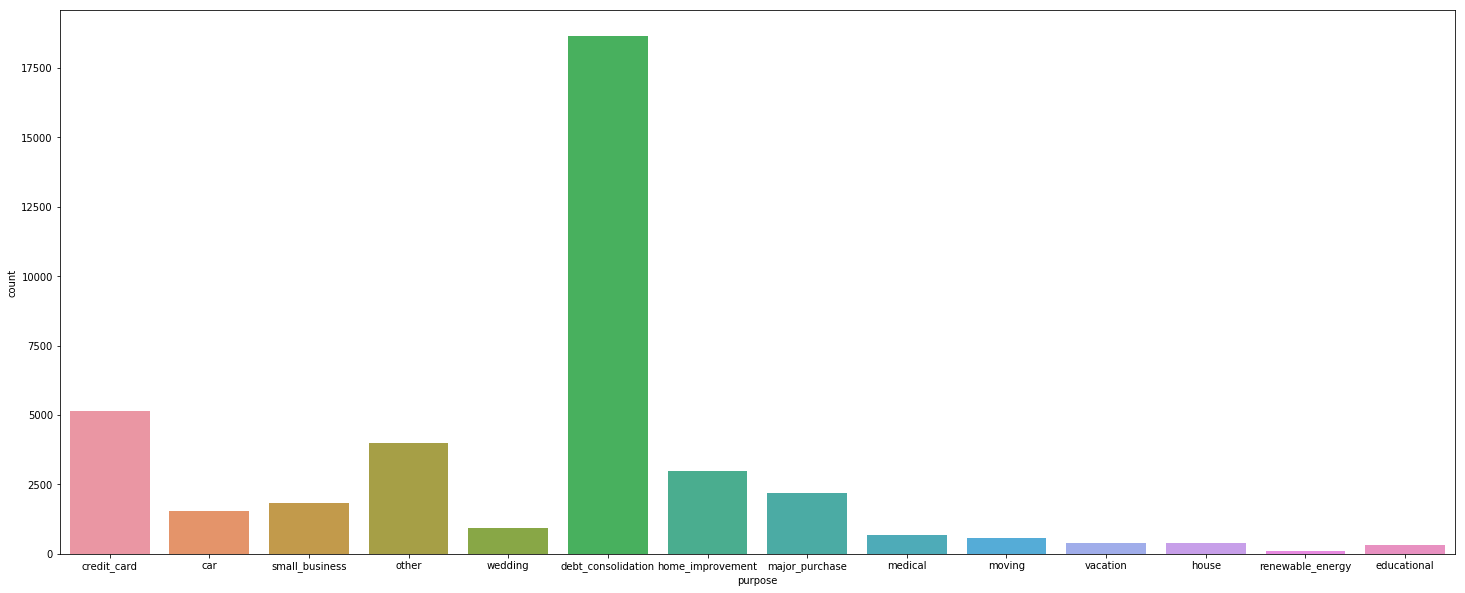

In [44]:
# lets first look at the number of loans for each type (purpose) of the loan
plt.figure(figsize=(25, 10))
sns.countplot(x='purpose', data=loan)
plt.show()

# loan for the purpose of consolidation, credit card,Other, home improvement and major purchase are higher.

In [45]:
#filtering the loan dataframe for above  major purpose of loans
loan_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan= loan[loan['purpose'].isin(loan_purposes)]
loan['purpose'].value_counts()

debt_consolidation    18641
credit_card            5130
home_improvement       2976
major_purchase         2187
Name: purpose, dtype: int64

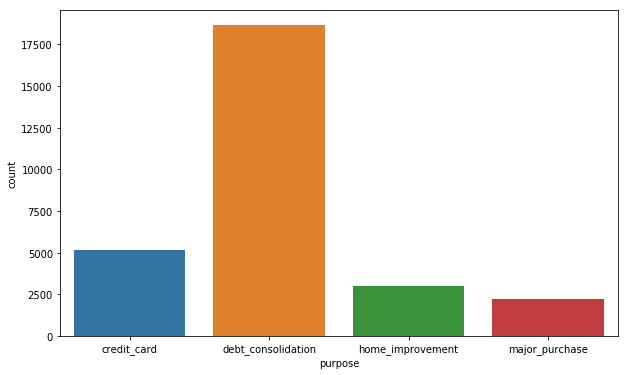

In [46]:
# plotting number of loans by purpose
plt.figure(figsize = (10,6))
sns.countplot(x=loan['purpose'])
plt.show()

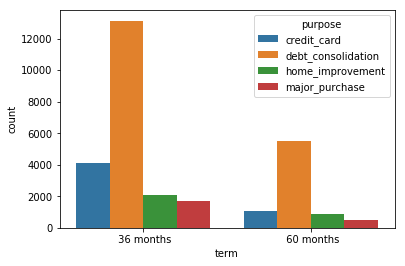

In [47]:
# purpose of loan and term across loan Status
sns.countplot(x = 'term', hue = 'purpose',data = loan)

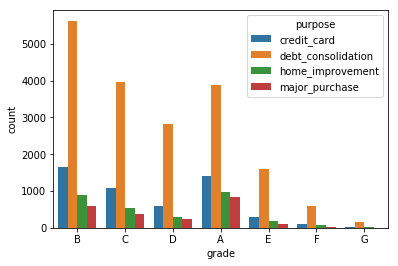

In [48]:
# purpose of loan and grade across loan Status
sns.countplot(x = 'grade', hue = 'purpose',data = loan)

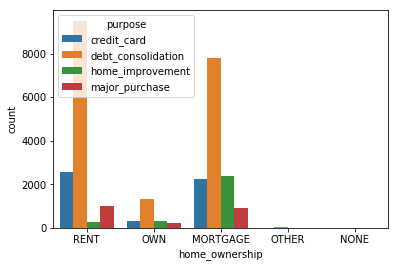

In [49]:
# purpose of loan and home ownership across loan Status
sns.countplot(x = 'home_ownership', hue = 'purpose',data = loan)

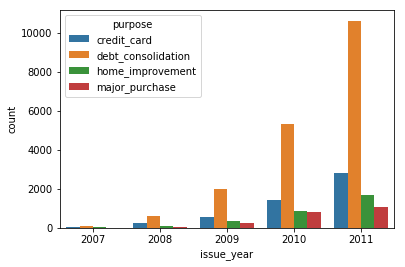

In [50]:
# purpose of loan and year across loan Status
sns.countplot(x = 'issue_year', hue = 'purpose',data = loan)

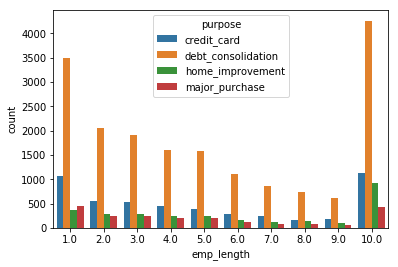

In [51]:
# purpose of loan and emp_length across loan Status
sns.countplot(x = 'emp_length', hue = 'purpose',data = loan)

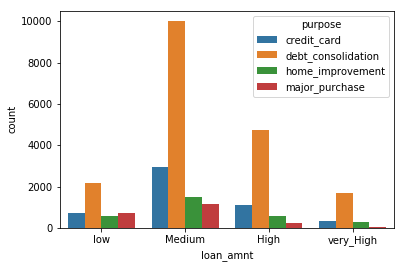

In [52]:
# purpose of loan and loan_amount across loan Status
sns.countplot(x = 'loan_amnt', hue = 'purpose',data = loan)

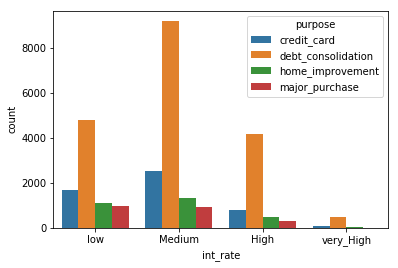

In [53]:
# purpose of loan and intrest rate across loan Status
sns.countplot(x = 'int_rate', hue = 'purpose',data = loan)

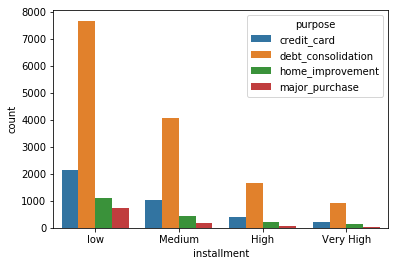

In [54]:
# purpose of loan and installment across loan Status
sns.countplot(x = 'installment', hue = 'purpose',data = loan)

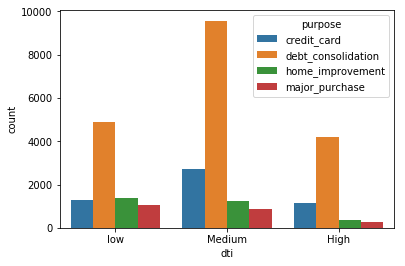

In [55]:
# purpose of loan and dti across loan Status
sns.countplot(x = 'dti', hue = 'purpose',data = loan)

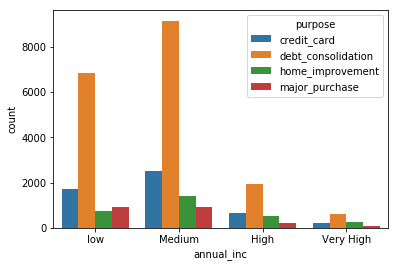

In [56]:
# purpose of loan and annual income  across loan Status
sns.countplot(x = 'annual_inc', hue = 'purpose',data = loan)